In [14]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod import utils

In [2]:
rng = np.random.default_rng(42)

# Ex1 
### 1D

In [3]:
def generate_data_with_noise (n_samples=100, a=3, b=4, mu=1, sigma2=1, high_var_x=False, high_var_y=False):
    if high_var_x:
        X = np.random.randn(n_samples, 1) * 10
    else:
        X = np.random.randn(n_samples, 1)

    noise = np.random.randn(n_samples) * np.sqrt(sigma2) * mu

    if high_var_y:
        noise *= 10

    y = a * X.flatten() + b + noise 

    return X, y

In [4]:
def compute_leverage_scores(X):
    X_design = np.c_[np.ones((X.shape[0], 1)), X] 
    H = X_design @ np.linalg.pinv(X_design.T @ X_design) @ X_design.T
    leverage_scores = np.diag(H)
    return leverage_scores

In [5]:
X1, y1 = generate_data_with_noise()
X2, y2 = generate_data_with_noise(high_var_x=True)
X3, y3 = generate_data_with_noise(high_var_y=True)
X4, y4 = generate_data_with_noise(high_var_x=True, high_var_y=True)

In [6]:
leverage1 = compute_leverage_scores(X1)
leverage2 = compute_leverage_scores(X2)
leverage3 = compute_leverage_scores(X3)
leverage4 = compute_leverage_scores(X4)

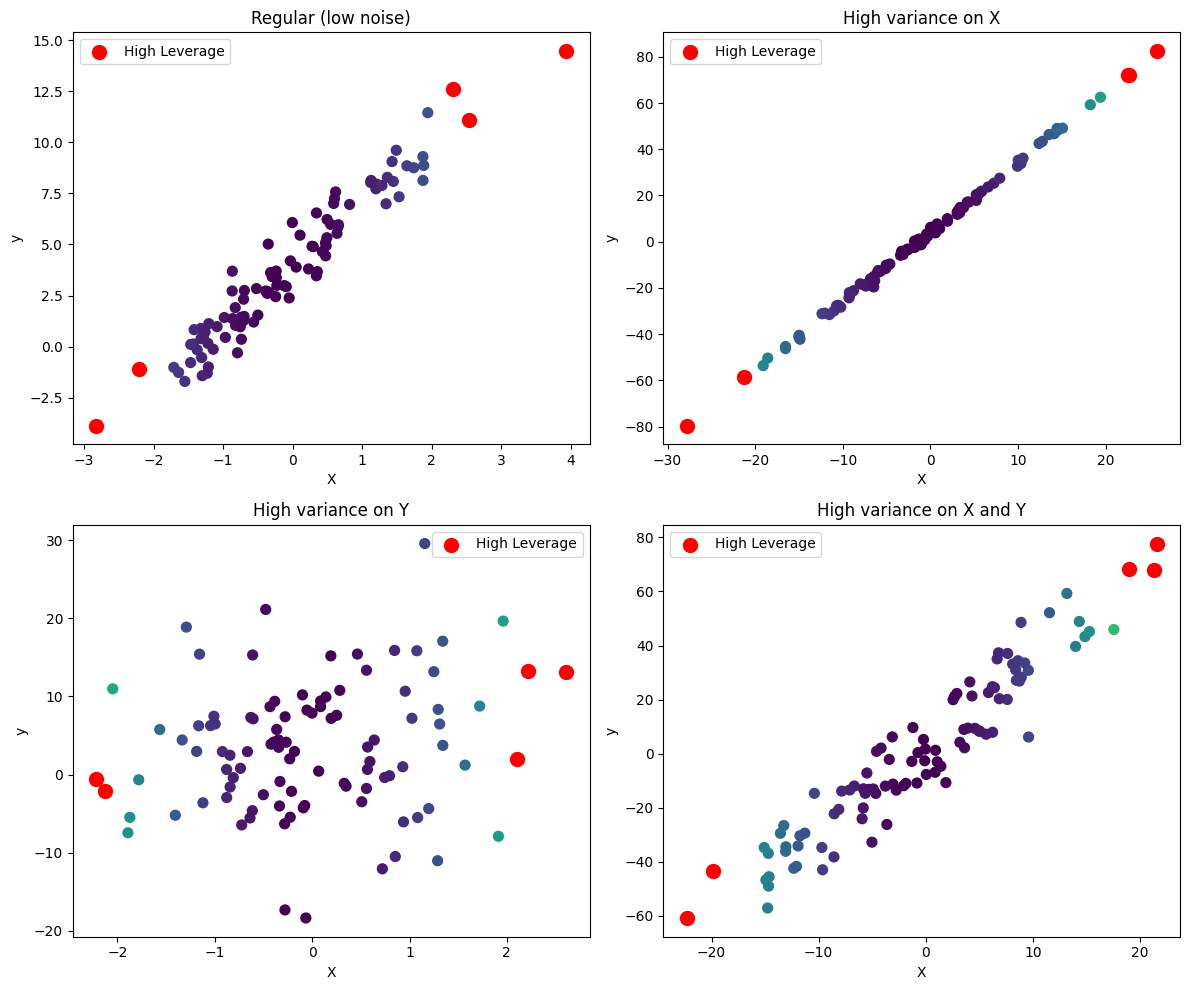

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

data = [(X1, y1, leverage1, 'Regular (low noise)'),
        (X2, y2, leverage2, 'High variance on X'),
        (X3, y3, leverage3, 'High variance on Y'),
        (X4, y4, leverage4, 'High variance on X and Y')]

num_high_leverage_points = 5

for i, (X, y, leverage, title) in enumerate(data):
    ax = axs[i // 2, i % 2]
    
    scatter = ax.scatter(X, y, c=leverage, cmap='viridis', s=50)
    
    high_leverage_indices = np.argsort(leverage)[-num_high_leverage_points:]
    ax.scatter(X[high_leverage_indices], y[high_leverage_indices], 
               color='red', s=100, label='High Leverage')
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()


### 2D

In [8]:
def generate_2d_data_with_noise(n_samples=100, a=3, b=2, c=4, mu=1, sigma2=1, high_var_x1=False, high_var_x2=False, high_var_y=False):
    if high_var_x1:
        X1 = np.random.randn(n_samples, 1) * 10  
    else:
        X1 = np.random.randn(n_samples, 1)
    
    if high_var_x2:
        X2 = np.random.randn(n_samples, 1) * 10  
    else:
        X2 = np.random.randn(n_samples, 1)
    
    noise = np.random.randn(n_samples) * np.sqrt(sigma2) * mu
    
    if high_var_y:
        noise *= 10

    y = a * X1.flatten() + b * X2.flatten() + c + noise

    return X1, X2, y

In [9]:
def compute_leverage_scores_2d(X1, X2):
    X_design = np.c_[np.ones((X1.shape[0], 1)), X1, X2] 
    H = X_design @ np.linalg.pinv(X_design.T @ X_design) @ X_design.T
    leverage_scores = np.diag(H)
    return leverage_scores

In [10]:
X1_1, X2_1, y1_2d = generate_2d_data_with_noise()
X1_2, X2_2, y2_2d = generate_2d_data_with_noise(high_var_x1=True)
X1_3, X2_3, y3_2d = generate_2d_data_with_noise(high_var_x2=True)
X1_4, X2_4, y4_2d = generate_2d_data_with_noise(high_var_x1=True, high_var_x2=True, high_var_y=True)

In [11]:
leverage1_2d = compute_leverage_scores_2d(X1_1, X2_1)
leverage2_2d = compute_leverage_scores_2d(X1_2, X2_2)
leverage3_2d = compute_leverage_scores_2d(X1_3, X2_3)
leverage4_2d = compute_leverage_scores_2d(X1_4, X2_4)

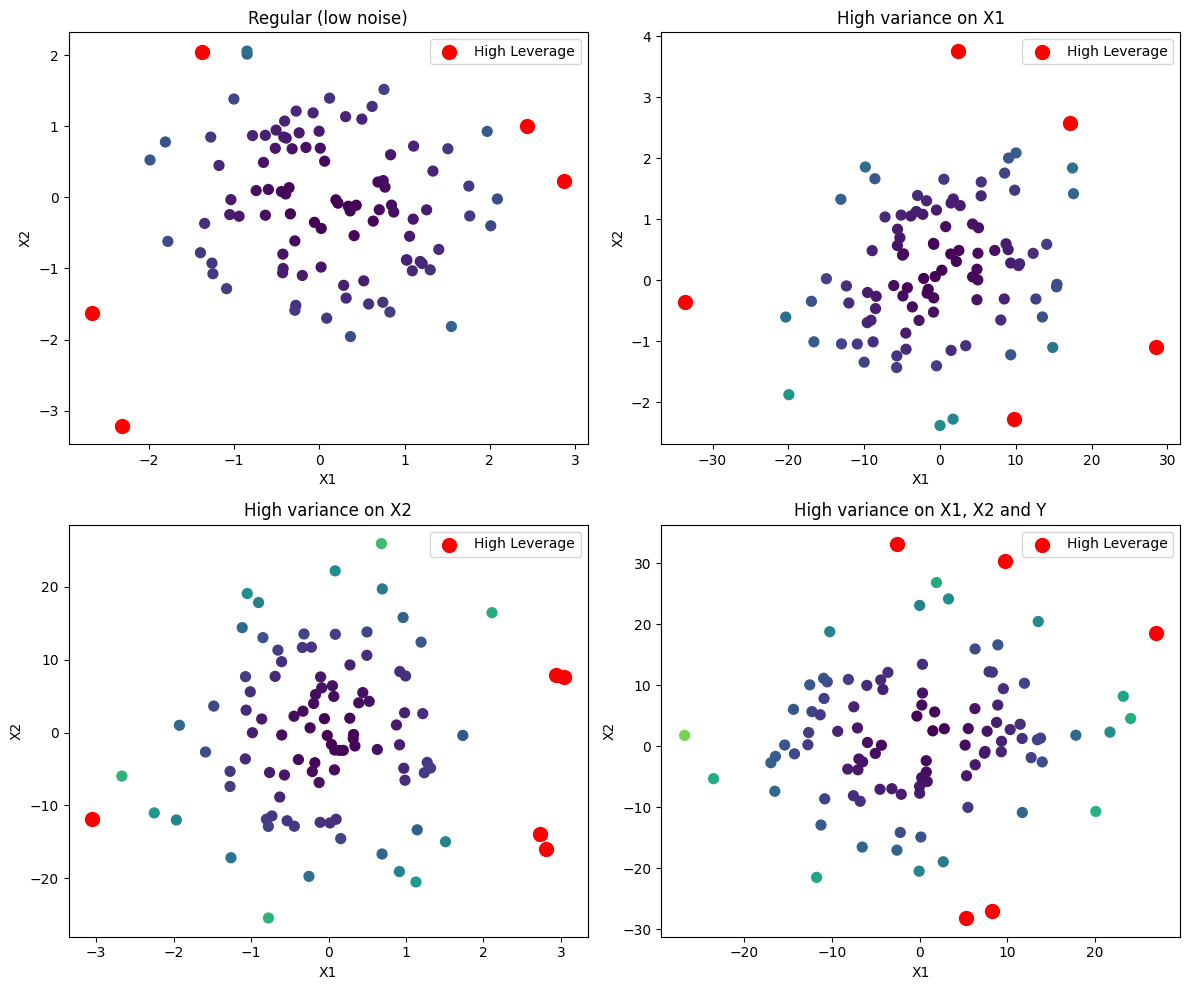

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

data_2d = [(X1_1, X2_1, y1_2d, leverage1_2d, 'Regular (low noise)'),
           (X1_2, X2_2, y2_2d, leverage2_2d, 'High variance on X1'),
           (X1_3, X2_3, y3_2d, leverage3_2d, 'High variance on X2'),
           (X1_4, X2_4, y4_2d, leverage4_2d, 'High variance on X1, X2 and Y')]

num_high_leverage_points = 5

for i, (X1, X2, y, leverage, title) in enumerate(data_2d):
    ax = axs[i // 2, i % 2]
    
    scatter = ax.scatter(X1, X2, c=leverage, cmap='viridis', s=50)
    
    high_leverage_indices = np.argsort(leverage)[-num_high_leverage_points:]
    ax.scatter(X1[high_leverage_indices], X2[high_leverage_indices], 
               color='red', s=100, label='High Leverage')
    
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend()


plt.tight_layout()
plt.show()

## Ex2

In [21]:
X_train, X_test, y_train, y_test = utils.data.generate_data_clusters(n_train=400, n_test=200, n_clusters=2, n_features=2, contamination=0.1)

In [ ]:
k = 10
clf = KNN(n_neighbors=k)
clf.fit(X_train)
y_train_pred = clf.labels_
scores_train = clf.decision_scores_
y_test_pred = clf.predict(X_test)
scores_test = clf.decision_function(X_test)

def panel_tuple(X, y_like, scores, title):
    return (X[:, 0], X[:, 1], y_like, scores, title)


data_2d = [panel_tuple(X_train, y_train, scores_train, "Ground truth labels (Train)"),
           panel_tuple(X_train,y_train_pred, scores_train,"Predicted (Train)"),
           panel_tuple(X_test,  y_test, scores_test,"Ground truth labels (Test)"),
           panel_tuple(X_test, y_train_pred, scores_test, "Predicted (Test)"),
]

num_high = 100
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, (X1, X2, y_like, leverage, title) in enumerate(data_2d):
    ax = axs[i]
    # base scatter colored by anomaly score ("leverage"-style colormap)
    sc = ax.scatter(X1, X2, c=leverage, cmap='viridis', s=40)

    # highlight the top-N most anomalous (largest scores)
    top_idx = np.argsort(leverage)[-num_high:]
    ax.scatter(X1[top_idx], X2[top_idx], color='red',
               s=80, label='Top anomalies')

    # optional: overlay markers to distinguish inliers/outliers if you want
    # (uncomment next 4 lines)
    # in_m = (y_like == 0)
    # out_m = (y_like == 1)
    # ax.scatter(X1[in_m],  X2[in_m],  facecolors='none', edgecolors='white', s=30, linewidths=1)
    # ax.scatter(X1[out_m], X2[out_m], facecolors='none', edgecolors='black', s=30, linewidths=1)

    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.legend(loc='lower right')
    
plt.tight_layout()
plt.show()